In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy import stats
import seaborn as sns

In [5]:
"""First we will handle the data from Wisconsin. The data set we found logs state monthly 
average temperatures from 1895 to 2009."""

wisc = pd.read_csv('data_files//wisconsin.csv',skiprows=[0],index_col='Year',na_values='M')
to_drop = ['Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19']
wisc = wisc.drop(to_drop, axis=1)
# 2009 doesn't have an entry for December or yearly temp, so we're dropping it.
wisc = wisc.drop(2009, axis=0)
wisc.columns = [i.title() for i in wisc.columns]

#wisc.loc[2009,'Year'] = round(wisc.loc[2009,'Jan':'Nov'].mean(),1)

# Dropping the annual data so I can get a column of the standard deviations within each year.
# I'll use this data to determine if monthly temperature has become more volatile.
wisc_std = wisc.drop('Year',axis=1)
wisc_std['st_d'] = wisc_std.std(axis=1)

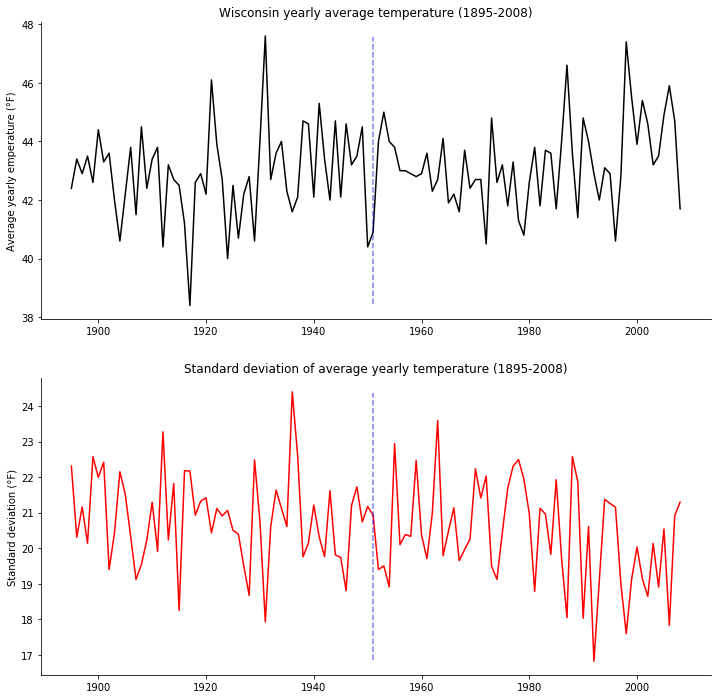

In [6]:
fig, ax = plt.subplots(2,1,figsize=[12,12])

# Just some basic initial plots to get an idea of what we're looking at.
ax[0].plot(wisc.index, wisc['Year'], c='black')
ax[0].set_title('Wisconsin yearly average temperature (1895-2008)')
ax[0].set_ylabel('Average yearly emperature (°F)')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].axvline(x=1951, ymin=0.05, ymax=0.95, linestyle='--', color='blue', alpha=0.5)

ax[1].plot(wisc_std.index, wisc_std['st_d'], c='red')
ax[1].set_title('Standard deviation of average yearly temperature (1895-2008)')
ax[1].set_ylabel('Standard deviation (°F)')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].axvline(x=1951, ymin=0.05, ymax=0.95, linestyle='--', color='blue', alpha=0.5)

# Just to be fancy and more organized, creates a new folder within current working directory 
# to hold graphs. Comment out the following two lines if any issues come up.
cwd = os.getcwd()
os.mkdir(cwd + '//graphs')

plt.savefig('graphs//wisc_1895-2008.svg', dpi=300, bbox_inches='tight')

In [7]:
# Splitting the data into two equal periods.
wisc1 = wisc[:57]
wisc2 = wisc[57:]

wisc1 = wisc1.rename(columns={'Year':'Annual'})
wisc2 = wisc2.rename(columns={'Year':'Annual'})

In [8]:
# Same as above, splitting the data in half.
wisc_std1 = wisc_std[:57]
wisc_std2 = wisc_std[57:]

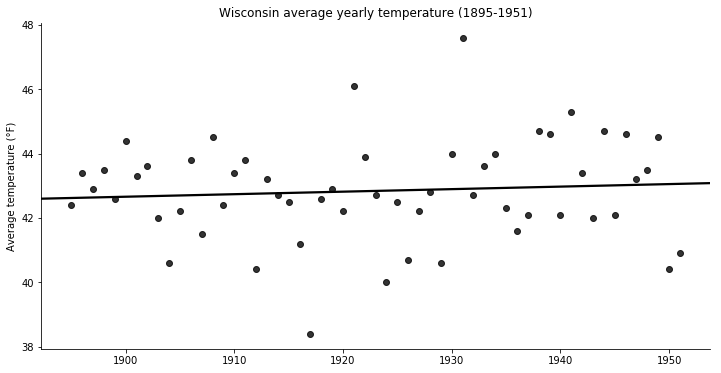

In [9]:
fig2,ax2 = plt.subplots(figsize=[12,6])

# I am doing a regplot so I can see the trend in our data. I'll do this for both periods.
sns.regplot(data = wisc1.reset_index(),
            x = 'Year',
            y = 'Annual', 
            ax = ax2,
            color = 'black',
            ci = 0)

sns.despine(ax = ax2)
ax2.set_title('Wisconsin average yearly temperature (1895-1951)')
ax2.set_xlabel('')
ax2.set_ylabel('Average temperature (°F)')

plt.savefig('graphs//wisc_1895_1951.svg', dpi=300)

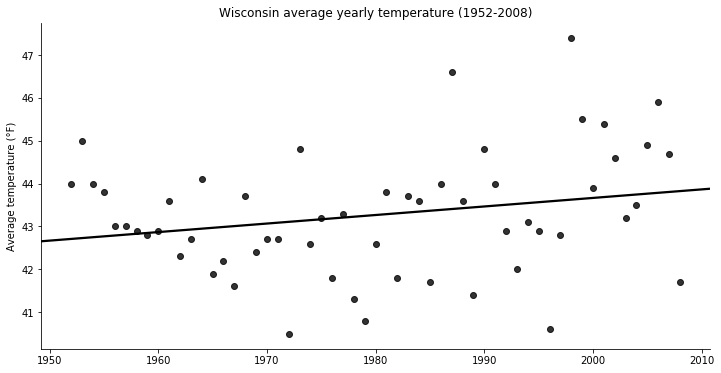

In [10]:
fig3, ax3 = plt.subplots(figsize=[12,6])

sns.regplot(data = wisc2.reset_index(),
            x = 'Year',
            y = 'Annual', 
            ax = ax3,
            color = 'black',
            ci = 0)

sns.despine(ax = ax3)
ax3.set_title('Wisconsin average yearly temperature (1952-2008)')
ax3.set_xlabel('')
ax3.set_ylabel('Average temperature (°F)')

plt.savefig('graphs//wisc_1952_2008.svg', dpi=300)

In [11]:
"""Testing to see if there is a significant difference between the variances of the two periods.
A p-value of 0.430 suggests that we cannot reject the null hypothesis that variances for all populations
are equal."""
print(stats.bartlett(wisc1['Annual'],wisc2['Annual']))

"""Testing to see if there is a significant difference between the means of both periods.
A p-value of 0.213 suggests that we cannot reject the null hypothesis that the two periods
have equal means. We did not use a Welch's test as the results of Bartlett's test above suggests
that population variances are equal."""
print(stats.ttest_ind(wisc1['Annual'],wisc2['Annual']))

# Another quick Bartlett test to determine if variances are equal or not.
print(stats.bartlett(wisc_std1['st_d'], wisc_std2['st_d']))

"""Testing to see if there is a significant difference in monthly standard deviations between
the two groups. A p-value of 0.0983 is close to significant, but not small enough to reject the null
hypothesis that the two periods have equal means. This was a bit of a strange way to do it, but
we wanted to make sure we were evaluating monthly data for the standard deviations rather than just
the annual average temperature data."""
print(stats.ttest_ind(wisc_std1['st_d'], wisc_std2['st_d']))

BartlettResult(statistic=0.5948649478183078, pvalue=0.440544015708929)
Ttest_indResult(statistic=-1.5238099881137221, pvalue=0.13037488885537726)
BartlettResult(statistic=1.4251520083964524, pvalue=0.2325572656559862)
Ttest_indResult(statistic=1.9280133945800622, pvalue=0.05638537984674112)


In [12]:
texas_fwd = pd.read_excel('data_files//texas_fwd.xlsx', na_values='n/a', index_col=0)
texas_aus = pd.read_excel('data_files//texas_aus.xlsx', na_values='M', index_col=0)
texas_fwd = texas_fwd.rename(columns={'Total':'Annual'})
# fwd = Forth Worth/Dallas, aus = Austin

In [13]:
texas_all = texas_fwd.append(texas_aus, sort=False)
# 2020 obviously had incomplete data, so we dropped it.
more_to_drop = [1898, 2020]
texas_all = texas_all[~texas_all.index.isin(more_to_drop)]
texas_all = texas_all.rename(columns={'Total':'Annual'})
texas_avg = texas_all.groupby('Year').mean()
texas_std = texas_avg.drop('Annual', axis=1)
texas_std['st_d'] = texas_std.std(axis=1)

"""We took the data from Austin & Fort Worth/Dallas and combined them into one dataframe.
After doing this, we performed a groupby by year and took the mean of the groupby object
to get an approximation for the yearly and monthly average temperatures for Texas. 
We took data from these cities specifically because we could not find overall
state data for Texas, so we took data from Austin and Fort Worth/Dallas because they are located 
in the southern and northen parts of the state respectively to get a more accurate version of 
total Texas data."""

'We took the data from Austin & Fort Worth/Dallas and combined them into one dataframe.\nAfter doing this, we performed a groupby by year and took the mean of the groupby object\nto get an approximation for the yearly and monthly average temperatures for Texas. \nWe took data from these cities specifically because we could not find overall\nstate data for Texas, so we took data from Austin and Fort Worth/Dallas because they are located \nin the southern and northen parts of the state respectively to get a more accurate version of \ntotal Texas data.'

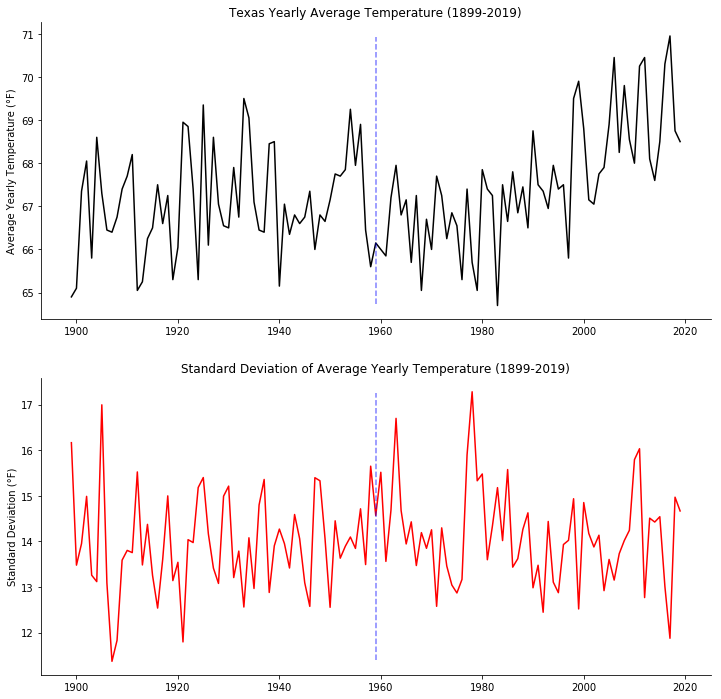

In [14]:
fig, ax = plt.subplots(2,1,figsize=[12,12])

# More initial plots just to visualize the data.
ax[0].plot(texas_avg.index, texas_avg['Annual'], c='black')
ax[0].set_title('Texas Yearly Average Temperature (1899-2019)')
ax[0].set_ylabel('Average Yearly Temperature (°F)')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].axvline(x=1959, ymin=0.05, ymax=0.95, color='blue', alpha=0.5, linestyle='--')

ax[1].plot(texas_std.index, texas_std['st_d'], c='red')
ax[1].set_title('Standard Deviation of Average Yearly Temperature (1899-2019)')
ax[1].set_ylabel('Standard Deviation (°F)')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].axvline(x=1959, ymin=0.05, ymax=0.95, color='blue', alpha=0.5, linestyle='--')

plt.savefig('graphs//tex_1899_2019.svg', dpi=300, bbox_inches='tight')

In [15]:
texas1 = texas_avg[:61]
texas2 = texas_avg[61:]

texas_std1 = texas_std[:61]
texas_std2 = texas_std[61:]
# data was split to run t-tests against both time periods

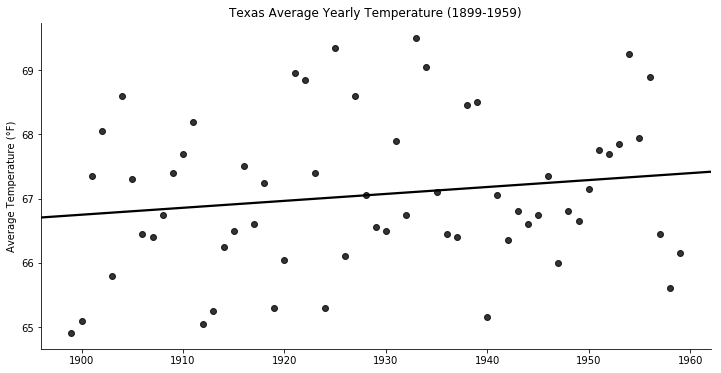

In [16]:
fig2,ax2 = plt.subplots(figsize=[12,6])

sns.regplot(x = 'Year',
            y = 'Annual',
            data = texas1.reset_index(),
            ax = ax2,
            color = 'black',
            ci = 0)

sns.despine(ax = ax2)
ax2.set_title('Texas Average Yearly Temperature (1899-1959)')
ax2.set_xlabel('')
ax2.set_ylabel('Average Temperature (°F)')

plt.savefig('graphs//tex_1899_1959.svg', dpi=300)

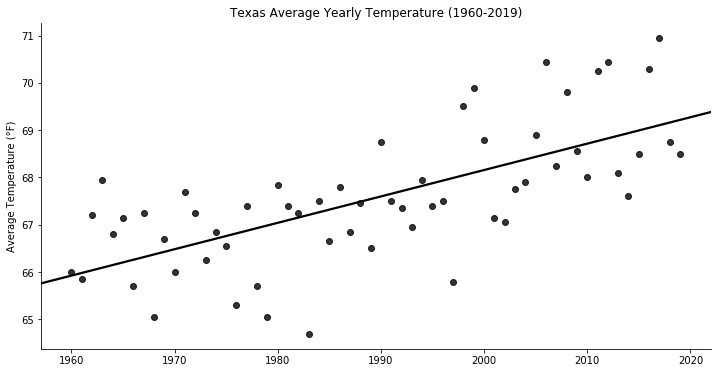

In [17]:
fig3, ax3 = plt.subplots(figsize=[12,6])

sns.regplot(data = texas2.reset_index(),
            x = 'Year',
            y = 'Annual', 
            ax = ax3,
            color = 'black',
            ci = 0)

sns.despine(ax = ax3)
ax3.set_title('Texas Average Yearly Temperature (1960-2019)')
ax3.set_xlabel('')
ax3.set_ylabel('Average Temperature (°F)')

plt.savefig('graphs//tex_1960_2019.svg', dpi=300)

In [18]:
# Test to see if the variances between the two periods are equal.
print(stats.bartlett(texas1['Annual'],texas2['Annual']))
# Test to see if there is a significant difference between the mean yearly temperature in both periods.
print(stats.ttest_ind(texas1['Annual'],texas2['Annual']))
# Another Bartlett test to determine if variances in both groups are equal.
print(stats.bartlett(texas_std1['st_d'],texas_std2['st_d']))
# Test to see if there is a significant difference between the two period standard deviations.
print(stats.ttest_ind(texas_std1['st_d'],texas_std2['st_d']))

BartlettResult(statistic=2.0946244934345084, pvalue=0.1478180255063178)
Ttest_indResult(statistic=-2.142166421351247, pvalue=0.034217747251432604)
BartlettResult(statistic=0.0012738438534633495, pvalue=0.9715287874626323)
Ttest_indResult(statistic=-0.9417972544216111, pvalue=0.34820444015565843)
